In [ ]:
!pip install tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Bidirectional, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt

np.random.seed(10)
data = pd.read_csv('colors.csv')
names = data["name"]

maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = sequence.pad_sequences(tokenized, maxlen=maxlen)

def scale(n):
    return int(n * 255)

normalized_values = np.column_stack([data["red"], data["green"], data["blue"]])
normalized_values = normalized_values / 255.0

model = Sequential()
model.add(Bidirectional(SimpleRNN(64, activation='relu'), input_shape=(maxlen, 3)))  # Use RGB values directly
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1), normalized_values, epochs=40, batch_size=32, validation_split=0.2)

def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2, 2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = sequence.pad_sequences(tokenized, maxlen=maxlen)
    pred = model.predict(np.repeat(padded[:, :, np.newaxis], 3, axis=-1))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r, g, b)
    plot_rgb(pred)


iron red
1/1 [==============================] - 0s 26ms/step
iron red, R,G,B: 154 80 78


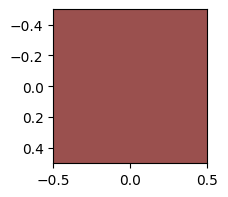

In [26]:
n = input()
predict(n)